In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [3]:
cd/gdrive/My Drive/AryaAI-Assignment/

/gdrive/My Drive/AryaAI-Assignment


In [4]:
ls

output.csv  test_set.csv  training_set.csv


Import all necessary libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
%matplotlib inline

Load training dataset from csv file

In [6]:
dataset = pd.read_csv('training_set.csv')
dataset = dataset.iloc[:, 1:]

Separate features and classes

In [7]:
features = dataset.iloc[:, :-1]
classes = dataset.iloc[:, -1]
# features.columns

Feature selection using L1 regularization

In [8]:
train_score = []
validation_score = []
k_vals = []
sc = StandardScaler()

for i in range(1, 10):
    k = i/10
    k_vals.append(k)
#     find unwanted features
    sel_ = SelectFromModel(LogisticRegression(C=k, penalty='l1', solver='liblinear'))
    sel_.fit(features.values, classes.values)
    unwanted_features = features.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]    
#     remove unwanted features
    refined_features = features.drop(unwanted_features, axis=1, inplace=False)
    refined_features.columns    
#     train validate split
    X_train, X_validate, y_train, y_validate = train_test_split(refined_features.values, classes.values, test_size = 0.20, random_state = 0)
    
    X_train = sc.fit_transform(X_train)
    X_validate = sc.transform(X_validate)    
#     classification using Logistic Regression
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train, y_train)    
    tr_score = classifier.score(X_train, y_train)
    train_score.append(tr_score)    
    val_score = classifier.score(X_validate, y_validate)
    validation_score.append(val_score)
    y_pred = classifier.predict(X_validate)

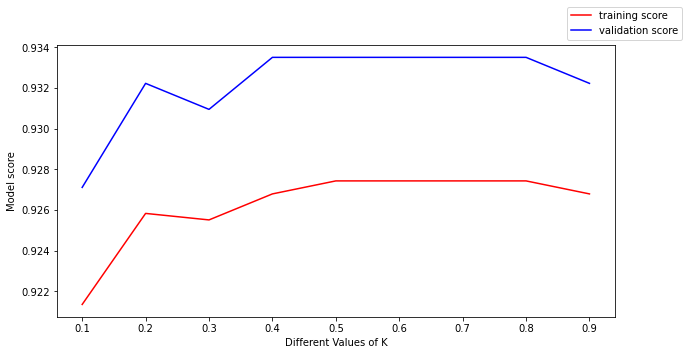

In [9]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of K')
plt.ylabel('Model score')
plt.plot(k_vals, train_score, color = 'r', label = "training score")
plt.plot(k_vals, validation_score, color = 'b', label = 'validation score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)